In [7]:
import pandas as pd
import numpy as np
import base64
import math

from skimage.filters import gaussian_filter
import skimage.color
import skimage.io

import scipy.misc

from itertools import tee, islice
import imageio

from IPython.display import HTML

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from more_itertools import pairwise
sns.set(color_codes=True)

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [22]:
def dog_pyramid_octave(im, nb_layers=5):
    k = 2**(1/nb_layers)
    init_sigma = 1.6
    gaussians = []
    for i in range(nb_layers):
        sigma = init_sigma * k**i
        g = gaussian_filter(im, sigma)
        gaussians.append(g)
    return np.stack([g1 - g0 for g0, g1 in pairwise(gaussians)]), np.stack(gaussians)

def dog_pyramid(im, nb_octaves=3, nb_layers=5):
    prev = im
    dogs = []
    for i in range(nb_octaves):
        dog, gaussians = dog_pyramid_octave(prev, nb_layers)
        prev = gaussians[-1, ::2, ::2]
        dogs.append(dog)
    return dogs

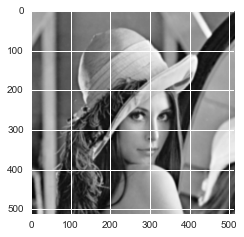

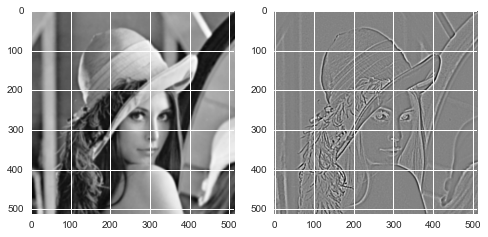

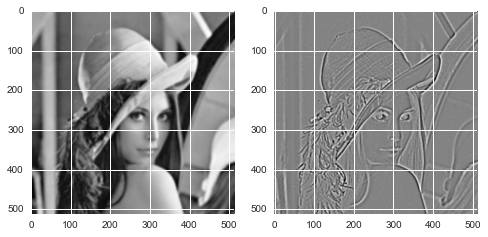

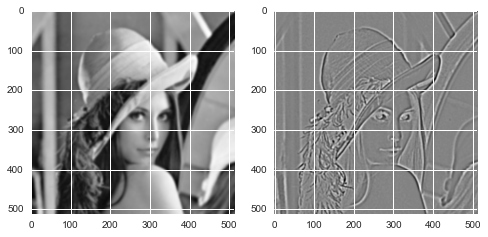

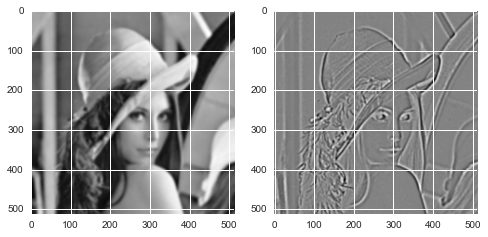

In [21]:
lena = scipy.misc.lena() / 255
dog, gs = dog_pyramid_octave(lena)

for i, g in enumerate(gs):
    plt.subplot(121)
    plt.imshow(g, cmap='gray')
    if i >= 1:
        plt.subplot(122)
        plt.imshow(dog[i-1], cmap='gray')
    plt.show()

In [ ]:
lena = scipy.misc.lena() / 255
dogs = dog_pyramid(lena)

for dog in (dogs):
    for i, d in enumerate(dog):
        plt.subplot(1, 4, i + 1)
        plt.imshow(d, cmap='gray')
        plt.axis('off')
    plt.show()